In [16]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import scipy.io

In [36]:
def pyLMS(filename, domain):
    '''
    Open acquisition .mat files saved from LMS Testlab
    '''
    mat = scipy.io.loadmat(filename)
    if domain == 'Time':
        ty = 'Signal'
    elif domain == 'PSD':
        ty = 'PSD'
    

    x = np.ravel(mat[ty]['x_values'])
    x_start = x[0][0][0][0][0][0]
    x_step = x[0][0][0][1][0][0]
    x_numbers = x[0][0][0][2][0][0]
    x_unit = x[0][0][0][3][0][0][0][0]
    x_vect = np.linspace(x_start, x_numbers * x_step, x_numbers)
    
    if x_unit == 's':
        x_mag = 'Time'
    elif x_unit == 'Hz':
        x_mag = 'Frequency'
        
    y = np.ravel(mat[ty]['y_values'])
    y_unit = y[0][0][0][1][0][0][0][0]
    y_conversion = y[0][0][0][1][0][0][1][0][0][1][0][0]
    y_vect = np.ravel(y[0][0][0][0]) * y_conversion 
    
    if y_unit == 'g':
        y_mag = 'Acceleration'
    elif y_unit == 'N':
        y_mag = 'Force'
    elif y_unit == 'Pa':
        y_mag = 'Pressure'
    else:
        y_mag = 'Energy'
        
    data = {'x' : x_vect, 'y' : y_vect}
    units = {'x' : x_unit, 'y' : y_unit}
    mags = {'x' : x_mag, 'y' : y_mag}
    out = {'signals': data, 'units': units,'mags': mags}
    
    return  out

In [28]:
data = pyLMS('data/accelerometro.mat', 'Time')
data

{'signals': {'x': array([1.29355469e-01, 1.30605253e-01, 1.31855038e-01, ...,
         7.43277500e+02, 7.43278750e+02, 7.43280000e+02]),
  'y': array([-0.01072271,  0.0111977 , -0.00043936, ..., -0.01657686,
         -0.00174556, -0.00194743])},
 'units': {'x': 's', 'y': 'g'},
 'mags': {'x': 'Time', 'y': 'Acceleration'}}

In [37]:
data = pyLMS('data/psd.mat', 'PSD')
data

{'signals': {'x': array([  3.        ,   3.98984772,   4.97969543,   5.96954315,
           6.95939086,   7.94923858,   8.93908629,   9.92893401,
          10.91878173,  11.90862944,  12.89847716,  13.88832487,
          14.87817259,  15.8680203 ,  16.85786802,  17.84771574,
          18.83756345,  19.82741117,  20.81725888,  21.8071066 ,
          22.79695431,  23.78680203,  24.77664975,  25.76649746,
          26.75634518,  27.74619289,  28.73604061,  29.72588832,
          30.71573604,  31.70558376,  32.69543147,  33.68527919,
          34.6751269 ,  35.66497462,  36.65482234,  37.64467005,
          38.63451777,  39.62436548,  40.6142132 ,  41.60406091,
          42.59390863,  43.58375635,  44.57360406,  45.56345178,
          46.55329949,  47.54314721,  48.53299492,  49.52284264,
          50.51269036,  51.50253807,  52.49238579,  53.4822335 ,
          54.47208122,  55.46192893,  56.45177665,  57.44162437,
          58.43147208,  59.4213198 ,  60.41116751,  61.40101523,
         

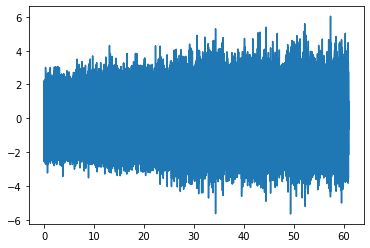

In [19]:
plt.plot(data['signals']['x'],data['signals']['y'])

In [31]:
mat = scipy.io.loadmat('data/psd.mat')

In [32]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Dec 16 14:58:06 2020',
 '__version__': '1.0',
 '__globals__': [],
 'PSD': array([[(array([[(array([[3]], dtype=uint8), array([[1]], dtype=uint8), array([[198]], dtype=uint8), array([[(array(['Hz'], dtype='<U2'), array([[(array([[0]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8))]],
       dtype=[('offset', 'O'), ('factor', 'O'), ('log_reference', 'O')]), array([[(array([[0]], dtype=uint8), array([[1]], dtype=uint8), array(['LENGTH'], dtype='<U6')),
         (array([[0]], dtype=uint8), array([[1]], dtype=uint8), array(['ANGLE'], dtype='<U5')),
         (array([[0]], dtype=uint8), array([[1]], dtype=uint8), array(['MASS'], dtype='<U4')),
         (array([[-1]], dtype=int16), array([[1]], dtype=uint8), array(['TIME'], dtype='<U4')),
         (array([[0]], dtype=uint8), array([[1]], dtype=uint8), array(['CURRENT'], dtype='<U7')),
         (array([[0]], dtype=uint8), array([[1]], dtype=uint8), array